# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv(r'D:\Rashu Studies\AppliedAICourse\Assignments\Mandatory Assignments\Mandatory Assignment 3 Donors Choose KNN\train_data.csv')
resource_data = pd.read_csv(r'D:\Rashu Studies\AppliedAICourse\Assignments\Mandatory Assignments\Mandatory Assignment 3 Donors Choose KNN\resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## NOW THE MOST IMPORTANT THING HERE IS THAT YOU SHOULD SPLIT OUR DATA INTO TRAIN AND TEST BEFORE APPLYING ANY FIT TECHNIQUE LIKE BOW OR TFIDF BECAUSE OTHEREWISE THERE WILL BE DATA LEAKAGE PROBLEM.ALSO FOR PREPROCESSING LIKE STANDARDIZATION AND NORMALIZATION ALSO WE SHOULD KEEP IN MIND THAT TRAIN TEST SPLIT SHOULD BE DONE BEFORE APPLYING THOSE PREPROCESSING TECHNIQUES

In [6]:
# REFER THIS SOUNDCLOUD LINK : https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf

# Train_Test Split

In [7]:
# train test split
# note that here This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
#For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])

# now getting the crossvalidation data from our train data
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [8]:
# Now we will be removing the column "project_is_approved" because that is the only one which our model needs to predict

X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)


### Now we will do all kind of preprocessing required for the train data ,test data,crossvalidation data separately

## FOR TRAIN DATA

##  Preprocessing of `project_subject_categories'

In [9]:
catogories = list(X_train['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_train['clean_categories'] = cat_list
X_train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## Preprocessing of  project_subject_subcategories

In [10]:
sub_catogories = list(X_train['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_train['clean_subcategories'] = sub_cat_list
X_train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text preprocessing

In [11]:
# merge two column text dataframe: 
X_train["essay"] = X_train["project_essay_1"].map(str) +\
                        X_train["project_essay_2"].map(str) + \
                        X_train["project_essay_3"].map(str) + \
                        X_train["project_essay_4"].map(str)

In [12]:
X_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay
64340,2186,p159565,25da59ec5fe57907b2920b00469619f9,Ms.,AZ,2017-02-28 22:59:52,Grades 3-5,Flexible Seating!,As a teacher in a low-income/high poverty scho...,This project requests a plethora of seating op...,NaN,NaN,"My students need Active Learning Stools, Seat ...",0,AppliedLearning Health_Sports,CharacterEducation Health_Wellness,As a teacher in a low-income/high poverty scho...
7989,627,p123727,689637c98999b1450274046befb77b51,Ms.,LA,2016-09-13 12:57:33,Grades 6-8,Bringing Social Studies to life!!,I have been a Social Studies teacher for 12 ye...,Many consider Socials Studies to be a very bor...,NaN,NaN,"My students need in need of 9 iPad mini's, cas...",0,History_Civics,Civics_Government History_Geography,I have been a Social Studies teacher for 12 ye...


In [13]:
# printing some random reviews
print(X_train['essay'].values[0])
print("="*50)
print(X_train['essay'].values[150])
print("="*50)
print(X_train['essay'].values[1000])
print("="*50)
print(X_train['essay'].values[20000])
print("="*50)
print(X_train['essay'].values[9999])
print("="*50)

As a teacher in a low-income/high poverty school, I see that my students are faced with challenges both in and out of the classroom. Despite the many challenges they face, I strive to create meaningful and engaging learning experiences for each of my students.  The students come with a wide variety of interests and abilities, and I am always searching for ways to foster their learning and ignite their natural curiosity.\r\n\r\nMy students are curious, intelligent, and kind individuals that love coming to school each day.  \r\n\r\nThis project requests a plethora of seating options.  These include... Flexible seating will allow students to choose what seat helps them learn best.  These seats will be more comfortable than traditional seating in order for students to stay on task and engaged in their daily learning.  \r\nStudents will have a larger ownership for their learning and feel empowered to have more control in their school day.  \r\nThese students work so hard each and everyday a

In [14]:
# creating a function named as decontracted which does the job of decontraction

# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(X_train['essay'].values[20000])
print(sent)
print("="*50)

Our little school is proud, energetic, and positive, but my 5th grade students face some serious difficulties. \r\nMore than 85% of them qualify for free or reduced-price lunch. These kids are eager to learn and are dedicated to their education, but they need a fighting chance to get there. They need some decent science materials to help our units come alive! Not only that, we need experimental and investigation materials that address the Next Generation Science Standards that they are supposed to become proficient in.Let is face it. With Smart Phones, fast-paced video games, and lots of intense stimuli, today is kids are hard to impress. Keeping them engaged can be tricky! \r\nWith this interactive white board system, I will be able to make every lesson and presentation an engaging experience! This simple system can turn any flat surface into a responding presentation screen! I can \"write\" on the presentation, highlight, and annotate. Cursor movements, mouse clicks, and drags can al

In [16]:
#\r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Our little school is proud, energetic, and positive, but my 5th grade students face some serious difficulties.   More than 85% of them qualify for free or reduced-price lunch. These kids are eager to learn and are dedicated to their education, but they need a fighting chance to get there. They need some decent science materials to help our units come alive! Not only that, we need experimental and investigation materials that address the Next Generation Science Standards that they are supposed to become proficient in.Let is face it. With Smart Phones, fast-paced video games, and lots of intense stimuli, today is kids are hard to impress. Keeping them engaged can be tricky!   With this interactive white board system, I will be able to make every lesson and presentation an engaging experience! This simple system can turn any flat surface into a responding presentation screen! I can  write  on the presentation, highlight, and annotate. Cursor movements, mouse clicks, and drags can all happ

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Our little school is proud energetic and positive but my 5th grade students face some serious difficulties More than 85 of them qualify for free or reduced price lunch These kids are eager to learn and are dedicated to their education but they need a fighting chance to get there They need some decent science materials to help our units come alive Not only that we need experimental and investigation materials that address the Next Generation Science Standards that they are supposed to become proficient in Let is face it With Smart Phones fast paced video games and lots of intense stimuli today is kids are hard to impress Keeping them engaged can be tricky With this interactive white board system I will be able to make every lesson and presentation an engaging experience This simple system can turn any flat surface into a responding presentation screen I can write on the presentation highlight and annotate Cursor movements mouse clicks and drags can all happen in real time I can control 

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not' 
# because although they are in this list but they matter a lot because
# they change the meaning of the entire sentence.
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above preprocessing techniques for all the project essays
from tqdm import tqdm
preprocessed_essays_Train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Train.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:21<00:00, 2304.29it/s]


In [20]:
# after preprocesing of project essays
preprocessed_essays_Train[20000]

'little school proud energetic positive 5th grade students face serious difficulties 85 qualify free reduced price lunch kids eager learn dedicated education need fighting chance get need decent science materials help units come alive not need experimental investigation materials address next generation science standards supposed become proficient let face smart phones fast paced video games lots intense stimuli today kids hard impress keeping engaged tricky interactive white board system able make every lesson presentation engaging experience simple system turn flat surface responding presentation screen write presentation highlight annotate cursor movements mouse clicks drags happen real time control screen computer additionally capture image record screen go imagine children helm creating presentation use interactive whiteboard system bring oral presentations new level engagement students thrilled demonstrate learning using wand nannan'

## Preprocessing of project_title

### Now we will simply apply the above preprocessing steps on the project title for the train data as well,as it is also a text feature

In [21]:
# printing some random titles.
print(X_train['project_title'].values[0])
print("="*50)
print(X_train['project_title'].values[150])
print("="*50)
print(X_train['project_title'].values[1000])
print("="*50)
print(X_train['project_title'].values[20000])
print("="*50)
print(X_train['project_title'].values[9999])
print("="*50)

Flexible Seating!
Chemistry and Conflict
Project Based Learning in Laguna Beach
Interactive Wand Makes Interactive Lessons
Move, Wiggle, and Learn Too!


#### We have already written the preprocessing codes for different preprocessing approaches now we will simply use those codes on the project titles 

In [24]:
preprocessed_project_titles_Train = []

for t in tqdm(X_train["project_title"]):
    title = decontracted(t)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_project_titles_Train.append(title.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 48732.30it/s]


In [25]:
# printing some random titles of train dataset after preprocessing

print(preprocessed_project_titles_Train[5000])
print("="*50)
print(preprocessed_project_titles_Train[7000])
print("="*50)
print(preprocessed_project_titles_Train[10000])
print("="*50)
print(preprocessed_project_titles_Train[45000])
print("="*50)
print(preprocessed_project_titles_Train[22000])
print("="*50)


going magic carpet ride
robotics coding ipad
read2learn everyone wins
seating other needs
rotate google chrome


# Test Data

##  Preprocessing of project_subject_categories

In [26]:
catogories = list(X_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_test['clean_categories'] = cat_list
X_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_test['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## Preprocessing of  project_subject_subcategories

In [27]:
sub_catogories = list(X_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_test['clean_subcategories'] = sub_cat_list
X_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_test['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text Preprocessing

In [28]:
# merge two column text dataframe: 
X_test["essay"] = X_test["project_essay_1"].map(str) +\
                        X_test["project_essay_2"].map(str) + \
                        X_test["project_essay_3"].map(str) + \
                        X_test["project_essay_4"].map(str)

In [29]:
X_test.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay
74982,22493,p070060,1cf3f78b96eb1bd06298442900ccd754,Mrs.,TX,2016-08-08 13:08:07,Grades PreK-2,Moving and Learning!,I love my school and the students I have the p...,My students need to move! I will not expect th...,NaN,NaN,My students need the classroom rug to be up an...,2,Health_Sports,Health_Wellness,I love my school and the students I have the p...
42830,172543,p027437,aa826b54027d8de6736a27387b06132d,Ms.,CA,2016-09-13 02:08:53,Grades PreK-2,Supplies For Our Class Please!,My student are motivated and eager to learn. ...,At the beginning of the school year my student...,NaN,NaN,"My students need some erasable pens, colored p...",158,Literacy_Language,Literacy Literature_Writing,My student are motivated and eager to learn. ...
95774,153245,p043170,fdab7ef1d919edb810cd6f92a91cbd00,Mrs.,GA,2016-07-01 16:40:34,Grades 3-5,Enhancing student learning in and out of the c...,\r\n\r\nI have been working at a Title I schoo...,\r\nSTUDENTS LEARN IN VARIOUS WAYS!\r\n\r\nOur...,NaN,NaN,"My students need books, magazines, and tablets...",1,Literacy_Language Math_Science,Literature_Writing Mathematics,\r\n\r\nI have been working at a Title I schoo...
31615,64860,p249944,e541a113d749bb8823f28dd3307c46d0,Ms.,CO,2016-06-06 22:06:32,Grades PreK-2,I Can't Hear It!,Our school is a dual language community school...,"Thankfully, our school has two intervention pr...",NaN,NaN,My students need ten headphones to complete a ...,27,Literacy_Language Math_Science,Literacy Mathematics,Our school is a dual language community school...
64601,40127,p018436,c6b9dee43d84007033aa8d4bcb522fbe,Ms.,MO,2017-02-26 13:28:30,Grades 3-5,Robotics and Programming for a FIRST LEGO Team,My students are bright and excited to learn! G...,We need programming and robotics materials to ...,NaN,NaN,My students need programming and robots materi...,0,Math_Science,AppliedSciences Mathematics,My students are bright and excited to learn! G...


In [30]:
# printing some random reviews
print(X_test['essay'].values[0])
print("="*50)
print(X_test['essay'].values[150])
print("="*50)
print(X_test['essay'].values[1000])
print("="*50)
print(X_test['essay'].values[20000])
print("="*50)
print(X_test['essay'].values[9999])
print("="*50)

I love my school and the students I have the pleasure of teaching. The environment when you walk in the door at Stephens is one that is inviting and comforting. You have a sense of being \"home\" that I strive to continue within my classroom. My school is a low socio-economic Title 1 school. My students are amazing individuals, but most face hardships that a child should not have to deal with. \r\nIt is so important that students have a comfortable and engaging learning environment. This is even more essential for my sweet students that do not have a stable and comforting home life. They come to school every day excited and ready to learn.\r\nMy students need to move! I will not expect them to sit in chairs all day long. Instead, we have researched some alternative ways for them to learn while being up and active. After much discussion, my students decided having some flexible seating within the classroom would help them focus and stay on task. \r\nStudents learn so much more when they

In [31]:
# creating a function named as decontracted which does the job of decontraction

# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [32]:
sent = decontracted(X_test['essay'].values[20000])
print(sent)
print("="*50)

As a teacher from an extremely rural district in Oregon I teach in a ranching community with a group of students that are in an economically depressed area.  Added to the mix are a group of students from four different continents, at least three different religious backgrounds and several different socio-economic backgrounds.  \r\nThis mix makes the school year very interesting.  It also makes teaching very difficult, as the teaching material must be at different levels due to the large differences between the different ranges of English levels.  It can get complicated quickly.Students learn a lot while reading novels.  The subject of the holocaust is one that cannot get enough attention.  Both the Lost Boys and the Holocaust are subjects that need attention in our world today.\r\nLong Way Gone and A Long Way to Water will give my students a chance to see what life is like for those less fortunate than themselves.  They will get to experience what other children had to suffer through a

In [33]:
#\r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

As a teacher from an extremely rural district in Oregon I teach in a ranching community with a group of students that are in an economically depressed area.  Added to the mix are a group of students from four different continents, at least three different religious backgrounds and several different socio-economic backgrounds.    This mix makes the school year very interesting.  It also makes teaching very difficult, as the teaching material must be at different levels due to the large differences between the different ranges of English levels.  It can get complicated quickly.Students learn a lot while reading novels.  The subject of the holocaust is one that cannot get enough attention.  Both the Lost Boys and the Holocaust are subjects that need attention in our world today.  Long Way Gone and A Long Way to Water will give my students a chance to see what life is like for those less fortunate than themselves.  They will get to experience what other children had to suffer through and u

In [34]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

As a teacher from an extremely rural district in Oregon I teach in a ranching community with a group of students that are in an economically depressed area Added to the mix are a group of students from four different continents at least three different religious backgrounds and several different socio economic backgrounds This mix makes the school year very interesting It also makes teaching very difficult as the teaching material must be at different levels due to the large differences between the different ranges of English levels It can get complicated quickly Students learn a lot while reading novels The subject of the holocaust is one that cannot get enough attention Both the Lost Boys and the Holocaust are subjects that need attention in our world today Long Way Gone and A Long Way to Water will give my students a chance to see what life is like for those less fortunate than themselves They will get to experience what other children had to suffer through and understand that not e

In [35]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not' 
# because although they are in this list but they matter a lot because
# they change the meaning of the entire sentence.
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [36]:
# Combining all the above preprocessing techniques for all the project essays
from tqdm import tqdm
preprocessed_essays_Test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Test.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:15<00:00, 2317.95it/s]


In [37]:
# after preprocesing of project essays
preprocessed_essays_Test[20000]

'teacher extremely rural district oregon teach ranching community group students economically depressed area added mix group students four different continents least three different religious backgrounds several different socio economic backgrounds mix makes school year interesting also makes teaching difficult teaching material must different levels due large differences different ranges english levels get complicated quickly students learn lot reading novels subject holocaust one cannot get enough attention lost boys holocaust subjects need attention world today long way gone long way water give students chance see life like less fortunate get experience children suffer understand not everyone life easy safe shedding light experiences lost boys hopefully prevent future acts genocide nannan'

## Preprocessing of project_title

### Now we will simply apply the above preprocessing steps on the project title for the test data as well,as it is also a text feature

In [38]:
# printing some random titles.
print(X_test['project_title'].values[0])
print("="*50)
print(X_test['project_title'].values[150])
print("="*50)
print(X_test['project_title'].values[1000])
print("="*50)
print(X_test['project_title'].values[20000])
print("="*50)
print(X_test['project_title'].values[9999])
print("="*50)

Moving and Learning!
Read a PAW Perfect Book!Reading
Through It All...READ!
Looking at the world of Genocide through literature
For the Kids classroom supplies


#### We have already written the preprocessing codes for different preprocessing approaches now we will simply use those codes on the project titles 

In [39]:
preprocessed_project_titles_Test = []

for t in tqdm(X_test["project_title"]):
    title = decontracted(t)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_project_titles_Test.append(title.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 47877.00it/s]


In [40]:
# printing some random titles of train dataset after preprocessing

print(preprocessed_project_titles_Test[5000])
print("="*50)
print(preprocessed_project_titles_Test[7000])
print("="*50)
print(preprocessed_project_titles_Test[10000])
print("="*50)
print(preprocessed_project_titles_Test[4500])
print("="*50)
print(preprocessed_project_titles_Test[22000])
print("="*50)


after school fire kids need supplies
graphic novels reach success english
keep swimmin
balance balls keep our minds and bodies active all day
wicincala okolakiciye gathering girls


# Cross validation data

##  Preprocessing of project_subject_categories

In [41]:
catogories = list(X_cv['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_cv['clean_categories'] = cat_list
X_cv.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_test['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## Preprocessing of  project_subject_subcategories

In [42]:
sub_catogories = list(X_cv['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_cv['clean_subcategories'] = sub_cat_list
X_cv.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_cv['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text Preprocessing

In [43]:
# merge two column text dataframe: 
X_cv["essay"] = X_cv["project_essay_1"].map(str) +\
                        X_cv["project_essay_2"].map(str) + \
                        X_cv["project_essay_3"].map(str) + \
                        X_cv["project_essay_4"].map(str)

In [44]:
X_cv.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay
72057,180194,p102427,0fbd66ea0f5bed9572b083d99638dbe9,Mrs.,IN,2016-10-27 15:01:59,Grades PreK-2,Guided Reading to Create Lifelong Readers,Our students come from a variety of different ...,We need to replenish our Guided Reading Book R...,NaN,NaN,My students need guided reading materials at t...,1,Literacy_Language,Literacy,Our students come from a variety of different ...
103938,67487,p151048,c528f613b3cd623047f317512945fa89,Mrs.,AZ,2016-10-20 15:06:42,Grades 3-5,STEM Projects for Fourth Grade,We are a cornucopia of students with all acade...,"By providing my students with these materials,...",NaN,NaN,"My students need items such as: rubber bands, ...",1,Math_Science,AppliedSciences Mathematics,We are a cornucopia of students with all acade...
9764,109956,p059337,df41db79d57143576a2cdaa3ff00b646,Mr.,NM,2017-03-06 14:03:27,Grades PreK-2,What's a Health Club?,Life has many struggles and everyday my studen...,Poverty is such a powerful force that it can c...,NaN,NaN,"My students need 30 heart rate monitors, so th...",3,Health_Sports,Health_Wellness,Life has many struggles and everyday my studen...
54591,166133,p058268,2b334e87aa695b068c47614fdfd5ff26,Ms.,CA,2016-07-08 02:14:40,Grades PreK-2,Swing Into the New Year!,My students attend a public school in San Fran...,A therapy swing in the classroom would serve m...,NaN,NaN,My students need a therapy swing to help regul...,18,SpecialNeeds,SpecialNeeds,My students attend a public school in San Fran...
25907,54069,p104194,88fb05940c51dbf6a367a132ad6a9359,Mrs.,TN,2016-11-04 19:26:24,Grades 6-8,See It! Paint It! Share It!,My school is a title one school in a rural set...,The document camera is essential for demonstra...,NaN,NaN,"My students need watercolor paint, paper, and ...",0,Music_Arts,VisualArts,My school is a title one school in a rural set...


In [45]:
# printing some random reviews
print(X_cv['essay'].values[0])
print("="*50)
print(X_cv['essay'].values[150])
print("="*50)
print(X_cv['essay'].values[1000])
print("="*50)
print(X_cv['essay'].values[20000])
print("="*50)
print(X_cv['essay'].values[9999])
print("="*50)

Our students come from a variety of different economic backgrounds with over 50% of our students receiving free or reduced lunch. Our school is also very ethnically diverse. The school is located approximately 3 miles from Purdue University.  Because of our proximity to Purdue, we have students representing 53 nations from around the world.  \r\n\r\nWe are a Title I school and we strive to meet individual student needs through daily guided reading instruction for every child.  We believe every child deserves the gift of reading!  \r\n\r\n\r\nWe need to replenish our Guided Reading Book Room.  We are a Title I school, and we use  a portion of our funding to hire reading specialists so that all students in grades K-3 get daily guided reading instruction.  We have a large number of K-3 students in reading groups that require multiple guided reading sets each week.  We need to add book sets at various reading levels to make sure these groups can continue to help students excel in their rea

In [46]:
# creating a function named as decontracted which does the job of decontraction

# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [47]:
sent = decontracted(X_cv['essay'].values[20000])
print(sent)
print("="*50)

Every morning I greet my students at the door and then we see where the learning for the day will take us.  My students come to school everyday excited to learn and want to do their best.\r\n\r\nI work in a title one school with a high poverty rate.  The school library and my classroom library are the only places many of my students are able to get books to read.\r\n\r\nI have twenty-one highly active fourth graders. I work in a high-poverty area where school is a safe place for many of my students.   My students enjoy coming to school and learning.My students enjoy reading about factual concepts but struggle to find books at their nonfiction reading level.  By having these book in my room, my students will have a number of nonfiction books at their fingertips.  These books will be put my classroom library for my students to read.  \r\n\r\nYour donation will help strengthen my classroom library is nonfiction section, which in turn will give my students more options on what to read.  No

In [48]:
#\r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Every morning I greet my students at the door and then we see where the learning for the day will take us.  My students come to school everyday excited to learn and want to do their best.    I work in a title one school with a high poverty rate.  The school library and my classroom library are the only places many of my students are able to get books to read.    I have twenty-one highly active fourth graders. I work in a high-poverty area where school is a safe place for many of my students.   My students enjoy coming to school and learning.My students enjoy reading about factual concepts but struggle to find books at their nonfiction reading level.  By having these book in my room, my students will have a number of nonfiction books at their fingertips.  These books will be put my classroom library for my students to read.      Your donation will help strengthen my classroom library is nonfiction section, which in turn will give my students more options on what to read.  Nonfiction boo

In [49]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not' 
# because although they are in this list but they matter a lot because
# they change the meaning of the entire sentence.
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [50]:
# Combining all the above preprocessing techniques for all the project essays
from tqdm import tqdm
preprocessed_essays_Cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Cv.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:11<00:00, 2139.81it/s]


In [51]:
# after preprocesing of project essays
preprocessed_essays_Test[20000]

'teacher extremely rural district oregon teach ranching community group students economically depressed area added mix group students four different continents least three different religious backgrounds several different socio economic backgrounds mix makes school year interesting also makes teaching difficult teaching material must different levels due large differences different ranges english levels get complicated quickly students learn lot reading novels subject holocaust one cannot get enough attention lost boys holocaust subjects need attention world today long way gone long way water give students chance see life like less fortunate get experience children suffer understand not everyone life easy safe shedding light experiences lost boys hopefully prevent future acts genocide nannan'

## Preprocessing of project_title

### Now we will simply apply the above preprocessing steps on the project title for the Cross Validation data as well,as it is also a text feature

In [52]:
# printing some random titles.
print(X_cv['project_title'].values[0])
print("="*50)
print(X_cv['project_title'].values[150])
print("="*50)
print(X_cv['project_title'].values[1000])
print("="*50)
print(X_cv['project_title'].values[20000])
print("="*50)
print(X_cv['project_title'].values[9999])
print("="*50)

Guided Reading to Create Lifelong Readers
Where in The World is Fox Oklahoma?
LEGOs for Creative Assessment and Math Concepts!
Factual Finds
Kindergarten Listening Center for Independent Work Time


In [53]:
preprocessed_project_titles_Cv = []

for t in tqdm(X_cv["project_title"]):
    title = decontracted(t)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_project_titles_Cv.append(title.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 48054.80it/s]


In [54]:
# printing some random titles of crossvalidation dataset after preprocessing

print(preprocessed_project_titles_Cv[5000])
print("="*50)
print(preprocessed_project_titles_Cv[7000])
print("="*50)
print(preprocessed_project_titles_Cv[10000])
print("="*50)
print(preprocessed_project_titles_Cv[4500])
print("="*50)
print(preprocessed_project_titles_Cv[22000])
print("="*50)


guided reading galore
help amazing kids get new books
creating techno world wizards
scientist mathematicians need library
help my students move while they work


# Preparing Data For Models

In [60]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

we are going to consider

   - school_state : categorical data
   - clean_categories : categorical data
   - clean_subcategories : categorical data
   - project_grade_category : categorical data
   - teacher_prefix : categorical data

   - project_title : text data
   - text : text data
   - project_resource_summary: text data (optinal)

   - quantity : numerical (optinal)
   - teacher_number_of_previously_posted_projects : numerical
   - price : numerical

### Now firstly we will be vectorizing the categorical data

### For vectorizing the categorical data we will be using One Hot Encoding Technique

### One Hot Encoding Of Project Clean Categories

### Checking if the characters like (. , _ , - ) are present in myu dictionary keys or not if they are present I need to reemove them as they don't make any sense for the vocabolary

In [70]:
message = "yes . is present " if '.' in sorted_cat_dict else "not . is not present"
print(message)

not . is not present


In [71]:
message = "yes - is present " if '-' in sorted_cat_dict else "not - is not present"
print(message)

not - is not present


In [72]:
message = "yes _ is present " if '_' in sorted_cat_dict else "not _ is not present"
print(message)

not _ is not present


In [73]:
# we use count vectorizer to convert the values into one hot encoded features


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

# we will be using the X_train for fitting our model because that is the only data a user knows rest all are for testing purposes
vectorizer.fit(X_train['clean_categories'].values)

print(vectorizer.get_feature_names())

categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)

categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)

categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)



['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [74]:
print("Shape of  Train data matrix after one hot encoding ",categories_one_hot_train.shape)
print("Shape of  Test data matrix after one hot encoding ",categories_one_hot_test.shape)
print("Shape of  CV data matrix after one hot encoding ",categories_one_hot_cv.shape)

Shape of  Train data matrix after one hot encoding  (49041, 9)
Shape of  Test data matrix after one hot encoding  (36052, 9)
Shape of  CV data matrix after one hot encoding  (24155, 9)


### One Hot Encoding Of Cleaned Project Sub Category

### Checking if the characters like (. , _ , - ) are present in myu dictionary keys or not if they are present I need to reemove them as they don't make any sense for the vocabolary

In [77]:
message = "yes . is present " if '.' in sorted_sub_cat_dict else "not . is not present"
print(message)

not . is not present


In [78]:
message = "yes - is present " if '-' in sorted_sub_cat_dict else "not - is not present"
print(message)

not - is not present


In [79]:
message = "yes _ is present " if '_' in sorted_sub_cat_dict else "not _ is not present"
print(message)

not _ is not present


In [80]:
# we use count vectorizer to convert the values into one hot encoded features


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)

# we will be using the X_train for fitting our model because that is the only data a user knows rest all are for testing purposes
vectorizer.fit(X_train['clean_subcategories'].values)

print(vectorizer.get_feature_names())

subcategories_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)

subcategories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)

subcategories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'ForeignLanguages', 'Civics_Government', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'Health_LifeScience', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [81]:
print("Shape of  Train data matrix after one hot encoding ",subcategories_one_hot_train.shape)
print("Shape of  Test data matrix after one hot encoding ",subcategories_one_hot_test.shape)
print("Shape of  CV data matrix after one hot encoding ",subcategories_one_hot_cv.shape)

Shape of  Train data matrix after one hot encoding  (49041, 30)
Shape of  Test data matrix after one hot encoding  (36052, 30)
Shape of  CV data matrix after one hot encoding  (24155, 30)


## One hot encoding of teacher prefix

In [83]:
mylist_teacher_prefix = list(X_train['teacher_prefix'])

In [84]:
# We are removing the duplicate values from our list of the teacher prefix

# Source :- https://www.w3schools.com/python/python_howto_remove_duplicates.asp

mylist_teacher_prefix_actual_Train = list(dict.fromkeys(mylist_teacher_prefix))

In [85]:
# removing the nan from the teacher prefix category as there is no such category of teacher which exists

mylist_teacher_prefix_actual_Train = [p for p in mylist_teacher_prefix_actual_Train if str(p) != 'nan']
mylist_teacher_prefix_actual_Train

['Ms.', 'Mr.', 'Mrs.', 'Teacher', 'Dr.']

#### Removing '.' from all the teacher prefixes.

In [89]:
# code for this from here --> https://stackoverflow.com/questions/8282553/removing-character-in-list-of-strings

mylist_teacher_prefix_actual_Train = ' '.join(mylist_teacher_prefix_actual_Train).replace('8','').split()

print(mylist_teacher_prefix_actual_Train)

['Ms', 'Mr', 'Mrs', 'Teacher', 'Dr']


In [90]:
# we use count vectorizer to convert the values into one hot encoded features

# now we are working on teacher prefix data

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=mylist_teacher_prefix_actual_Train, lowercase=False, binary=True)

# I was getting an error like "np.nan is an invalid document, expected byte or unicode string."
# below is the solution

# https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document


vectorizer.fit(X_train['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())

teacher_prefix_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))




['Ms', 'Mr', 'Mrs', 'Teacher', 'Dr']


In [91]:
print("Shape of matrix of Train data after one hot encoding ",teacher_prefix_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",teacher_prefix_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",teacher_prefix_one_hot_cv.shape)

Shape of matrix of Train data after one hot encoding  (49041, 5)
Shape of matrix of Test data after one hot encoding  (36052, 5)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 5)


## One Hot encoding of project grade category

In [95]:
mylist_project_grade_category = list(X_train['project_grade_category'])

In [96]:
# We are removing the duplicate values from our list of the project grade category

# Source :- https://www.w3schools.com/python/python_howto_remove_duplicates.asp

mylist_project_grade_category_actual = list(dict.fromkeys(mylist_project_grade_category))

In [98]:
type(mylist_project_grade_category_actual)
print(mylist_project_grade_category_actual[0])

n = len(mylist_project_grade_category_actual)
print(n)

# I already saw by running the code that the word Grades is unnecessarily present in the elements of list hence trying to remove that word
# how to remove a word from a sentence --> https://codescracker.com/python/program/python-program-remove-word-from-sentence.htm
for m in range(0,4,1):
    words = mylist_project_grade_category_actual[m].split()
    mylist_project_grade_category_actual[m] = ''.join([j for j in words if j not in "Grades"])
print(mylist_project_grade_category_actual)    
    

3-5
4
['3-5', '6-8', 'PreK-2', '9-12']


#### Replacing '-' with '_' as it is the convention to write 

In [99]:
# code for this from here --> https://stackoverflow.com/questions/8282553/removing-character-in-list-of-strings

mylist_project_grade_category_actual = ' '.join(mylist_project_grade_category_actual).replace('-','_').split()

print(mylist_project_grade_category_actual)

['3_5', '6_8', 'PreK_2', '9_12']


In [100]:
# we use count vectorizer to convert the values into one hot encoded features

# now we are working on project grade category data

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=mylist_project_grade_category_actual, lowercase=False, binary=True)


vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())

project_grade_categories_one_hot_train = vectorizer.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values)



['3_5', '6_8', 'PreK_2', '9_12']


In [101]:
print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

Shape of matrix of Train data after one hot encoding  (49041, 4)
Shape of matrix of Test data after one hot encoding  (36052, 4)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 4)


## One hot encoding of School States

In [102]:
type(list(project_data['school_state']))

list

In [103]:
mylist = list(X_train['school_state'])

In [104]:
# We are removing the duplicate values from our list of the state codes

# Source :- https://www.w3schools.com/python/python_howto_remove_duplicates.asp

mylist_actual = list(dict.fromkeys(mylist))

In [105]:
# we use count vectorizer to convert the values into one hot encoded features

# now we are working on school state data

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=mylist_actual, lowercase=False, binary=True)

vectorizer.fit(X_train['school_state'].values)

print(vectorizer.get_feature_names())

school_state_categories_one_hot_train = vectorizer.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)


['AZ', 'LA', 'TX', 'CA', 'AR', 'FL', 'NY', 'KY', 'KS', 'NC', 'TN', 'SC', 'UT', 'GA', 'NJ', 'NV', 'WA', 'CT', 'OH', 'PA', 'MA', 'IN', 'IL', 'VA', 'MI', 'OR', 'AL', 'MN', 'WI', 'DC', 'MO', 'MS', 'VT', 'ME', 'MD', 'NM', 'AK', 'ID', 'WV', 'OK', 'MT', 'CO', 'NE', 'DE', 'RI', 'IA', 'HI', 'SD', 'ND', 'WY', 'NH']


In [106]:
print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

Shape of matrix of Train data after one hot encoding  (49041, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 51)


## Now as we have done the vectorizing of categorical data now we will be vectorizing the text data using different techniques 

# Vectorizing the text data

## Technique -1 Bag of words(BOW) 

## Essays

### Essays Train Data

In [107]:
# I am not setting the value of min_df here because i read here 
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
# that min_df helps in better performance but might also give poor clusters hence am trying without it this time 



vectorizer = CountVectorizer(ngram_range=(1, 2),min_df = 10,max_features = 5000)
vectorizer.fit(preprocessed_essays_Train)

essay_bow_train = vectorizer.transform(preprocessed_essays_Train)

print("Shape of matrix after bag of words ",essay_bow_train.shape)

Shape of matrix after bag of words  (49041, 5000)


### Essay Test Data

In [108]:
# I am not setting the value of min_df here because i read here 
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
# that min_df helps in better performance but might also give poor clusters hence am trying without it this time 


# now note that the below two lines are wrong because we have already trained the 
# model on the training data now using that model we should get the bow representation 
# of test data. After all training from test data only and then cecking for its accuracy will ofcourse give 
# good accuracy.

# lines not to be used (I used them but then going through the code realised the mistake)

#vectorizer = CountVectorizer()
#vectorizer.fit(preprocessed_essays_Test)

essay_bow_test = vectorizer.transform(preprocessed_essays_Test)

print("Shape of matrix after bag of words ",essay_bow_test.shape)

Shape of matrix after bag of words  (36052, 5000)


### Essay Cross Validation data 

In [109]:
# I am not setting the value of min_df here because i read here 
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
# that min_df helps in better performance but might also give poor clusters hence am trying without it this time 

# similarly below two lines should not be used

#vectorizer = CountVectorizer()
#vectorizer.fit(preprocessed_essays_Cv)

essay_bow_cv = vectorizer.transform(preprocessed_essays_Cv)

print("Shape of matrix after bag of words ",essay_bow_cv.shape)

Shape of matrix after bag of words  (24155, 5000)


## Project Title

In [110]:
# we are imposing no min_df or ngram_range constraint on project title vectorization
vectorizer = CountVectorizer()

### Bag of words on Project Title Train data

In [111]:
vectorizer.fit(preprocessed_project_titles_Train)
project_title_bow_train = vectorizer.transform(preprocessed_project_titles_Train)
print("Shape of matrix after bag of words ",project_title_bow_train.shape)

Shape of matrix after bag of words  (49041, 11612)


### Bag of words on Project Title Test data

In [112]:
project_title_bow_test = vectorizer.transform(preprocessed_project_titles_Test)
print("Shape of matrix after bag of words ",project_title_bow_test.shape)

Shape of matrix after bag of words  (36052, 11612)


### Bag of words on Project Title Cross Validation data

In [113]:
project_title_bow_cv = vectorizer.transform(preprocessed_project_titles_Cv)
print("Shape of matrix after bag of words ",project_title_bow_cv.shape)

Shape of matrix after bag of words  (24155, 11612)


# Technique-2 TFIDF

## Essay Data

### Essay Train Data

In [114]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features = 5000,ngram_range = (1,2), min_df = 10)
vectorizer_tfidf.fit(preprocessed_essays_Train)

text_tfidf_train = vectorizer_tfidf.transform(preprocessed_essays_Train)
print("Shape of matrix after tfidf ",text_tfidf_train.shape)

print(type(text_tfidf_train))

# we are converting a dictionary with word as a key, and the idf as a value

dictionary = dict(zip(vectorizer_tfidf.get_feature_names(), list(vectorizer_tfidf.idf_)))
tfidf_words = set(dictionary.keys())

Shape of matrix after tfidf  (49041, 5000)
<class 'scipy.sparse.csr.csr_matrix'>


### Essay Test data

In [117]:
text_tfidf_test = vectorizer_tfidf.transform(preprocessed_essays_Test)
print("Shape of matrix after tfidf ",text_tfidf_test.shape)

Shape of matrix after tfidf  (36052, 5000)


### Essay Cross Validation Data

In [118]:
text_tfidf_cv = vectorizer_tfidf.transform(preprocessed_essays_Cv)
print("Shape of matrix after tfidf ",text_tfidf_cv.shape)

Shape of matrix after tfidf  (24155, 5000)


## Project Title

### Project title train data

In [183]:
vectorizer = TfidfVectorizer(max_features = 3000,ngram_range = (1,2), min_df = 10)

vectorizer.fit(preprocessed_project_titles_Train)

project_title_tfidf_train = vectorizer.transform(preprocessed_project_titles_Train)

print("Shape of matrix after tfidf ",project_title_tfidf_train.shape)

# we are converting a dictionary with word as a key, and the idf as a value

dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
tfidf_project_title_words = set(dictionary.keys())

Shape of matrix after tfidf  (49041, 3000)


### Project title test data

In [184]:
project_title_tfidf_test = vectorizer.transform(preprocessed_project_titles_Test)
print("Shape of matrix after tfidf ",project_title_tfidf_test.shape)

Shape of matrix after tfidf  (36052, 3000)


### Project title cross validation data

In [185]:
title_tfidf_cv = vectorizer.transform(preprocessed_project_titles_Cv)
print("Shape of matrix after tfidf ",title_tfidf_cv.shape)

Shape of matrix after tfidf  (24155, 3000)


# Technique-3 Average Word to Vector

### Using pretrained w2v model in the file glove

In [122]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## Essay Train data

In [123]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_train = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_Train): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:10<00:00, 4495.02it/s]


49041
300


## Essay Test data

In [124]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_test = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_Test): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:07<00:00, 4510.29it/s]


36052
300


## Essay Cross Validation data

In [125]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_cv = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_Cv): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:05<00:00, 4509.31it/s]


24155
300


## Project Title train data

In [126]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_project_title_train = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_project_titles_Train): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_train.append(vector)

print(len(avg_w2v_vectors_project_title_train))
print(len(avg_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:00<00:00, 83321.19it/s]


49041
300


## Project Title test data

In [127]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_project_title_test = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_project_titles_Test): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_test.append(vector)

print(len(avg_w2v_vectors_project_title_test))
print(len(avg_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 83179.38it/s]


36052
300


## Project title Cross Validation data 

In [128]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_project_title_cv = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_project_titles_Cv): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_cv.append(vector)

print(len(avg_w2v_vectors_project_title_cv))
print(len(avg_w2v_vectors_project_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 80885.01it/s]


24155
300


# Technique-4 TFIDF weighted Word To Vector

## Essay train data

In [129]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_text_train = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_essays_Train): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_train.append(vector)

print(len(tfidf_w2v_vectors_text_train))
print(len(tfidf_w2v_vectors_text_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [00:56<00:00, 860.80it/s]


49041
300


## Essay test data

In [130]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_text_test = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_essays_Test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_test.append(vector)

print(len(tfidf_w2v_vectors_text_test))
print(len(tfidf_w2v_vectors_text_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [00:41<00:00, 861.81it/s]


36052
300


## Essay cross validation

In [131]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_text_cv = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_essays_Cv): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_cv.append(vector)

print(len(tfidf_w2v_vectors_text_cv))
print(len(tfidf_w2v_vectors_text_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:27<00:00, 865.93it/s]


24155
300


# Project Title Train data

In [132]:
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 10)

vectorizer.fit(preprocessed_project_titles_Train)

project_title_tfidf_train = vectorizer.transform(preprocessed_project_titles_Train)

print("Shape of matrix after tfidf ",project_title_tfidf_train.shape)

# we are converting a dictionary with word as a key, and the idf as a value

dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
tfidf_project_title_words = set(dictionary.keys())

Shape of matrix after tfidf  (49041, 2000)


In [133]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_project_title_train = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_project_titles_Train): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_train.append(vector)

print(len(tfidf_w2v_vectors_project_title_train))
print(len(tfidf_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 44151.79it/s]


49041
300


## Project title test data

In [134]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_project_title_test = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_project_titles_Test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_test.append(vector)

print(len(tfidf_w2v_vectors_project_title_test))
print(len(tfidf_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 43694.39it/s]


36052
300


## project title cross validation data

In [135]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_project_title_cv = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_project_titles_Cv): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_cv.append(vector)

print(len(tfidf_w2v_vectors_project_title_cv))
print(len(tfidf_w2v_vectors_project_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 44387.04it/s]


24155
300


# Numerical Features

## vectorizing numerical features

### Price for projects

In [136]:
# now firstly we will try to add the price and the quantity of the items required from the resource dataframe

price_quantity_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

price_quantity_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


## now we need to join the above dataframe with our train,test,cv data that we already have

In [137]:
X_train = pd.merge(X_train, price_quantity_data, on='id', how='left')
X_test = pd.merge(X_test, price_quantity_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_quantity_data, on='id', how='left')

## we will be performing the normalization of the numerical data here 

#### Normalizing the price data

In [138]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
price_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)


After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train['price'].values.reshape(-1,1))

price_train = scaler.transform(X_train['price'].values.reshape(-1,1))
price_cv = scaler.transform(X_cv['price'].values.reshape(-1,1))
price_test = scaler.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)



After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Normalizing the quantity data

In [140]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['quantity'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_test.shape, y_test.shape)
print(quantity_cv.shape, y_cv.shape)


After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


In [141]:
scaler = StandardScaler()

scaler.fit(X_train['quantity'].values.reshape(-1,1))

quantity_train = scaler.transform(X_train['quantity'].values.reshape(-1,1))
quantity_test = scaler.transform(X_test['quantity'].values.reshape(-1,1))
quantity_cv = scaler.transform(X_cv['quantity'].values.reshape(-1,1))

print("After vectorizations")

print(quantity_train.shape, y_train.shape)
print(quantity_test.shape, y_test.shape)
print(quantity_cv.shape, y_cv.shape)

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


#### Normalizing the number of previously posted projects by a teacher

In [142]:
normalizer = Normalizer()

# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After converting into vectors form")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)


After converting into vectors form
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [143]:
scaler = StandardScaler()

scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = scaler.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After converting into vectors form")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After converting into vectors form
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# Applying Logistic regression

## Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)

### Note that we are using the BOW with bigrams here and min_df value = 10 and max features = 5000 i am mentioning this here specially because trying different values of these will for sure give differeent results and may be better also but will require good computational resources.

###  Now we need to merge all the numerical vectors(categorical features,text features,numerical features) given above for set-1 which we created using different methods

In [144]:
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train,subcategories_one_hot_train,teacher_prefix_one_hot_train,project_grade_categories_one_hot_train,school_state_categories_one_hot_train,essay_bow_train,project_title_bow_train,price_train,quantity_train,prev_projects_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test,subcategories_one_hot_test,teacher_prefix_one_hot_test,project_grade_categories_one_hot_test,school_state_categories_one_hot_test,essay_bow_test,project_title_bow_test,price_test,quantity_test,prev_projects_test)).tocsr()
X_cv_merge = hstack((categories_one_hot_cv,subcategories_one_hot_cv,teacher_prefix_one_hot_cv,project_grade_categories_one_hot_cv,school_state_categories_one_hot_cv,essay_bow_cv,project_title_bow_cv,price_cv,quantity_cv,prev_projects_cv)).tocsr()

In [145]:
# this will be our finally created data matrix dimensions

print(X_train_merge.shape, y_train.shape)
print(X_test_merge.shape, y_test.shape)
print(X_cv_merge.shape, y_cv.shape)



(49041, 16714) (49041,)
(36052, 16714) (36052,)
(24155, 16714) (24155,)


## Now there are three methods to apply logistic regression
## 1.) Using LogisticRegression() classifier
## 2.) Using GridSearchCv()
## 3.) Using RandomSearch.

# Let us use the GridSearchCv for the purpose of Logistic regression

### Importing the required modules

In [146]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression

### Giving a set of values of 'C'(1/lamda) to get which works best.

In [147]:
#tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

# using the above values the model was giving the error as - Liblinear failed to converge, increase the number of iterations.

# hence  number of values increased in this set

In [148]:
#model_lr = GridSearchCV(LogisticRegression(),tuned_parameters,cv=10,scoring = 'roc_auc')
#model_lr.fit(X_train_merge,y_train)

In [149]:
# i have increased the values of C because i was getting lot of less iteration warnings using the less number of values of C

In [150]:
tuned_parameters = {'C': [10**-4,10**-3.10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}

In [154]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge,y_train)

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\RASHU TYAGI\Anaconda3\lib

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.7869401927894549, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [155]:
#https://stackoverflow.com/questions/44947574/what-is-the-meaning-of-mean-test-score-in-cv-result

train_auc= model_lr.cv_results_['mean_train_score']
cv_auc = model_lr.cv_results_['mean_test_score']

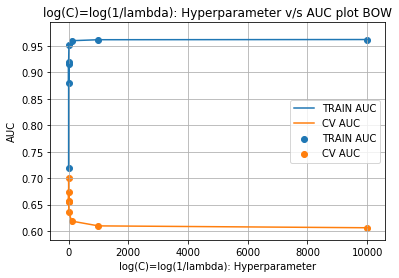

In [156]:
plt.scatter(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.scatter(tuned_parameters['C'],cv_auc,label = 'CV AUC')
plt.plot(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.plot(tuned_parameters['C'],cv_auc,label = 'CV AUC')
plt.legend()
plt.xlabel("log(C)=log(1/lambda): Hyperparameter")
plt.ylabel("AUC")
plt.title("log(C)=log(1/lambda): Hyperparameter v/s AUC plot BOW")
plt.grid()
plt.show()

### As we can see the major problem we are seeing in our above plot is that the values we took for C are either very close or very very far away hence it is not that easy to infer anything from here so now i will try some other set of values of C 

In [157]:
tuned_parameters = {'C': [0.0075,0.015,0.03,0.06,0.15,0.3,0.75]}

In [158]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0075, 0.015, 0.03, 0.06, 0.15, 0.3, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [159]:
#https://stackoverflow.com/questions/44947574/what-is-the-meaning-of-mean-test-score-in-cv-result

train_auc= model_lr.cv_results_['mean_train_score']
cv_auc = model_lr.cv_results_['mean_test_score']

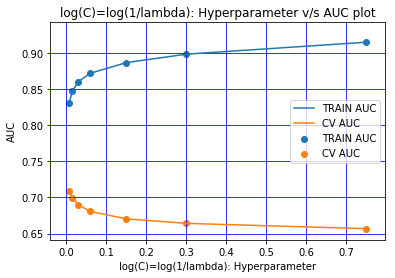

In [160]:
plt.scatter(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.scatter(tuned_parameters['C'],cv_auc,label = 'CV AUC')
plt.plot(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.plot(tuned_parameters['C'],cv_auc,label = 'CV AUC')
plt.legend()
plt.xlabel("log(C)=log(1/lambda): Hyperparameter")
plt.ylabel("AUC")
plt.title("log(C)=log(1/lambda): Hyperparameter v/s AUC plot")
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

### From above we can say that the best hyperparameter value(C) based on the cv auc is at c = 0.0075

## Now our task is to Train the Logistic Regression model based on the best hyperparameter value we received from above i.e. C=0.0075

# Training the Logistic Regression model using the best hyperparameter value from above

In [161]:
tuned_parameters = {'C': [0.0075]}

In [162]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0075]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score='warn', scoring='roc_auc', verbose=0)

### Model training done for the best hyperparameter now drawing the roc curve for the same.

In [163]:
from sklearn.metrics import roc_auc_score
import math

In [164]:
y_train_pred =  model_lr.predict_proba(X_train_merge)[:,1]
    
y_test_pred =  model_lr.predict_proba(X_test_merge)[:,1]

In [165]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

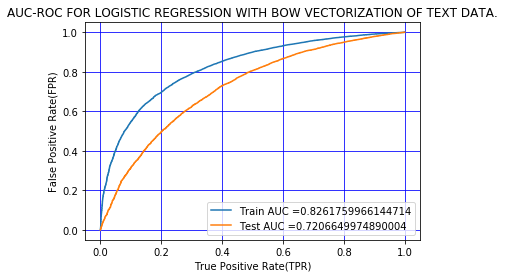

In [166]:
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC-ROC FOR LOGISTIC REGRESSION WITH BOW VECTORIZATION OF TEXT DATA.")

plt.show()

### We received the train accuracy of 0.82 and test accuracy of 0.72 which is not that bad actually.

# Confusion matrix for above data

In [167]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Confusion matrix for train and test data for BOW vectorization

In [168]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.353
[[ 3713  3713]
 [ 4181 37434]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.417
[[ 2617  2842]
 [ 5563 25030]]


### Visually plotting the confusion matrix for training data

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.353


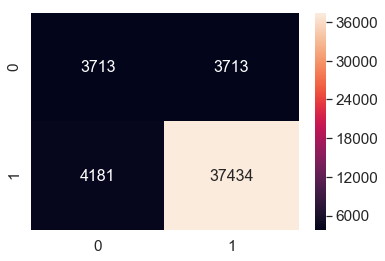

In [169]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Visually plotting the confusion matrix for test data

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.417


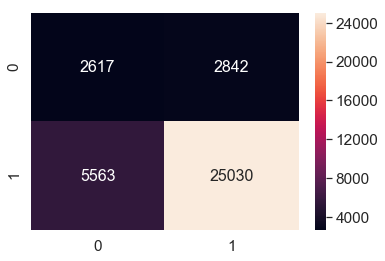

In [170]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_test = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_test, annot=True,annot_kws={"size": 16},fmt='g')# font size

# Set 2 : categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)

### Note that we are using the tfidf with bigrams here and min_df value = 10 and max features = 5000 i am mentioning this here specially because trying different values of these will for sure give differeent results and may be better also but will require good computational resources.

###  Now we need to merge all the numerical vectors(categorical features,text features,numerical features) given above for set-2 which we created using different methods

In [186]:
from scipy.sparse import hstack

X_train_merge_set_2 = hstack((categories_one_hot_train,subcategories_one_hot_train,teacher_prefix_one_hot_train,project_grade_categories_one_hot_train,school_state_categories_one_hot_train,text_tfidf_train,project_title_tfidf_train,price_train,quantity_train,prev_projects_train)).tocsr()
X_test_merge_set_2 = hstack((categories_one_hot_test,subcategories_one_hot_test,teacher_prefix_one_hot_test,project_grade_categories_one_hot_test,school_state_categories_one_hot_test,text_tfidf_test,project_title_tfidf_test,price_test,quantity_test,prev_projects_test)).tocsr()
X_cv_merge_set_2 = hstack((categories_one_hot_cv,subcategories_one_hot_cv,teacher_prefix_one_hot_cv,project_grade_categories_one_hot_cv,school_state_categories_one_hot_cv,text_tfidf_cv,title_tfidf_cv,price_cv,quantity_cv,prev_projects_cv)).tocsr()

In [187]:
# this will be our finally created data matrix dimensions

print(X_train_merge_set_2.shape, y_train.shape)
print(X_test_merge_set_2.shape, y_test.shape)
print(X_cv_merge_set_2.shape, y_cv.shape)


(49041, 8102) (49041,)
(36052, 8102) (36052,)
(24155, 8102) (24155,)


### Giving a set of values of 'C'(1/lamda) to get which works best.

In [188]:
tuned_parameters = {'C': [0.0075,0.015,0.03,0.06,0.15,0.3,0.75]}

In [189]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge_set_2,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0075, 0.015, 0.03, 0.06, 0.15, 0.3, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [190]:
#https://stackoverflow.com/questions/44947574/what-is-the-meaning-of-mean-test-score-in-cv-result

train_auc= model_lr.cv_results_['mean_train_score']
cv_auc = model_lr.cv_results_['mean_test_score']

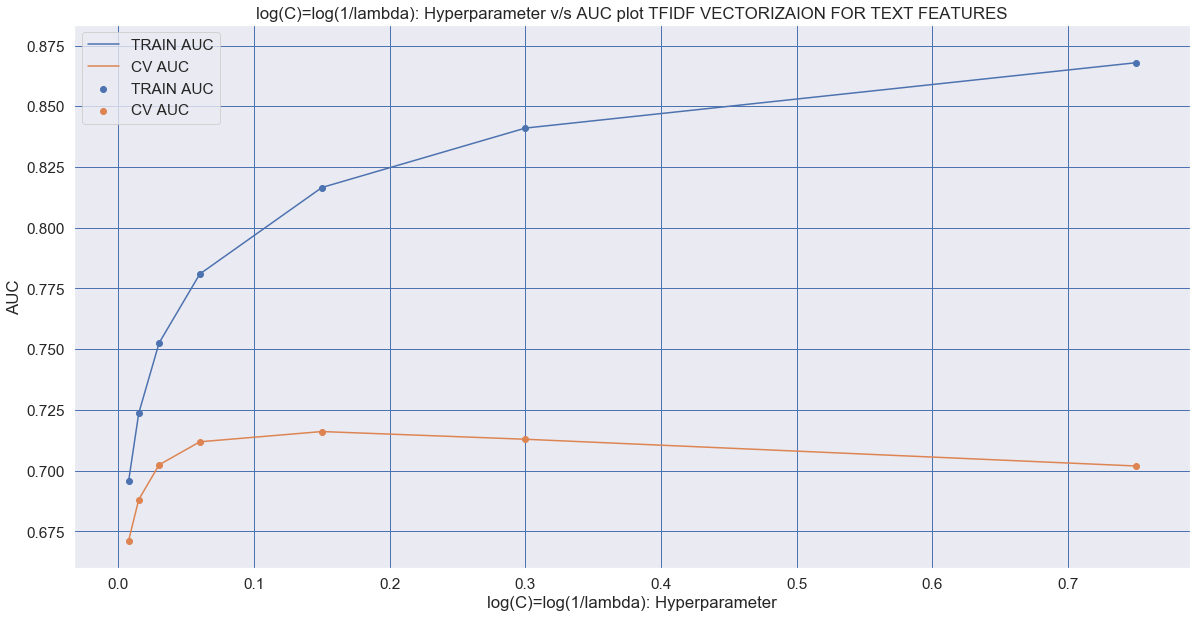

In [191]:

plt.figure(figsize=(20,10))
plt.scatter(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.scatter(tuned_parameters['C'],cv_auc,label = 'CV AUC')
plt.plot(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.plot(tuned_parameters['C'],cv_auc,label = 'CV AUC')

plt.grid(b=True, which='major', color='b', linestyle='-')
plt.legend()
plt.xlabel("log(C)=log(1/lambda): Hyperparameter")
plt.ylabel("AUC")
plt.title("log(C)=log(1/lambda): Hyperparameter v/s AUC plot TFIDF VECTORIZAION FOR TEXT FEATURES")
plt.show()

### From above we can say that the best hyperparameter value(C) based on the cv auc is at c = 0.15

## Now our task is to Train the Logistic Regression model based on the best hyperparameter value we received from above i.e. C=0.15

# Training the Logistic Regression model using the best hyperparameter value from above

In [192]:
tuned_parameters = {'C': [0.15]}

In [193]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge_set_2,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None, param_grid={'C': [0.15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### Model training done for the best hyperparameter now drawing the roc curve for the same.

In [194]:
y_train_pred =  model_lr.predict_proba(X_train_merge_set_2)[:,1]
    
y_test_pred =  model_lr.predict_proba(X_test_merge_set_2)[:,1]

In [195]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

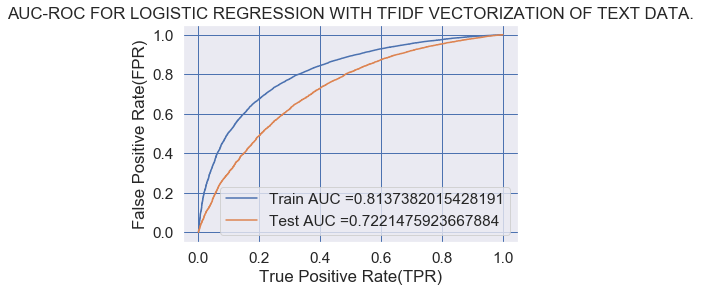

In [196]:
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC-ROC FOR LOGISTIC REGRESSION WITH TFIDF VECTORIZATION OF TEXT DATA.")

plt.show()

### We received the train accuracy of 0.81 and test accuracy of 0.72 which is not that bad actually.

# Confusion matrix for above data

### Confusion matrix for train and test data for TFIDF vectorization

In [197]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.39
[[ 3713  3713]
 [ 4476 37139]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.439
[[ 2716  2743]
 [ 5748 24845]]


### Visually plotting the confusion matrix for training data

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.39


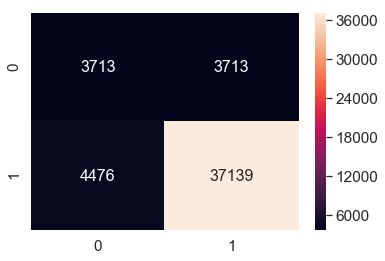

In [198]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Visually plotting the confusion matrix for testdata

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.439


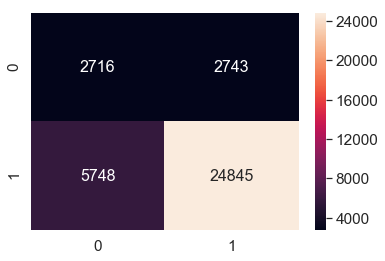

In [199]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_test = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_test, annot=True,annot_kws={"size": 16},fmt='g')# font size

# Set 3 : categorical, numerical features + project_title(AVG W2V) + preprocessed_essay (AVG W2V)

###  Now we need to merge all the numerical vectors(categorical features,text features,numerical features) given above for set-3 which we created using different methods

In [200]:
from scipy.sparse import hstack

X_train_merge_set_3 = hstack((categories_one_hot_train,subcategories_one_hot_train,teacher_prefix_one_hot_train,project_grade_categories_one_hot_train,school_state_categories_one_hot_train,avg_w2v_vectors_train,avg_w2v_vectors_project_title_train,price_train,quantity_train,prev_projects_train)).tocsr()
X_test_merge_set_3 = hstack((categories_one_hot_test,subcategories_one_hot_test,teacher_prefix_one_hot_test,project_grade_categories_one_hot_test,school_state_categories_one_hot_test,avg_w2v_vectors_test,avg_w2v_vectors_project_title_test,price_test,quantity_test,prev_projects_test)).tocsr()
X_cv_merge_set_3 = hstack((categories_one_hot_cv,subcategories_one_hot_cv,teacher_prefix_one_hot_cv,project_grade_categories_one_hot_cv,school_state_categories_one_hot_cv,avg_w2v_vectors_cv,avg_w2v_vectors_project_title_cv,price_cv,quantity_cv,prev_projects_cv)).tocsr()

In [201]:
# this will be our finally created data matrix dimensions

print(X_train_merge_set_3.shape, y_train.shape)
print(X_test_merge_set_3.shape, y_test.shape)
print(X_cv_merge_set_3.shape, y_cv.shape)


(49041, 702) (49041,)
(36052, 702) (36052,)
(24155, 702) (24155,)


### Giving a set of values of 'C'(1/lamda) to get which works best.

In [203]:
tuned_parameters = {'C': [0.0075,0.015,0.03,0.06,0.15,0.3,0.75]}

In [204]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge_set_3,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0075, 0.015, 0.03, 0.06, 0.15, 0.3, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [206]:
#https://stackoverflow.com/questions/44947574/what-is-the-meaning-of-mean-test-score-in-cv-result

train_auc= model_lr.cv_results_['mean_train_score']
cv_auc = model_lr.cv_results_['mean_test_score']

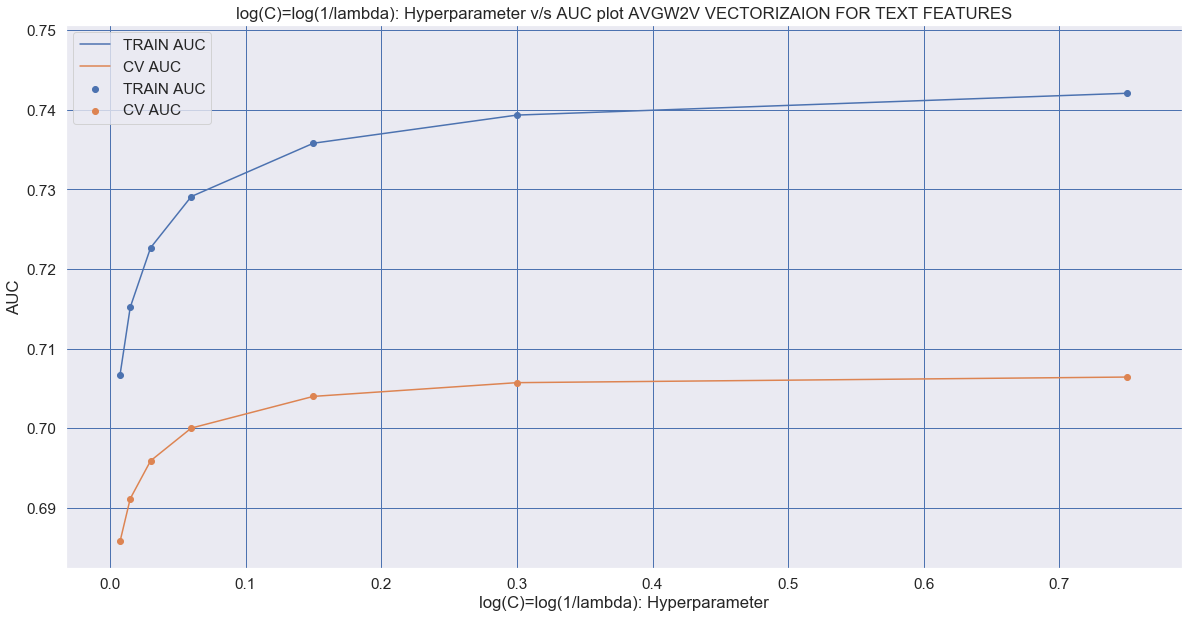

In [207]:

plt.figure(figsize=(20,10))
plt.scatter(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.scatter(tuned_parameters['C'],cv_auc,label = 'CV AUC')
plt.plot(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.plot(tuned_parameters['C'],cv_auc,label = 'CV AUC')

plt.grid(b=True, which='major', color='b', linestyle='-')
plt.legend()
plt.xlabel("log(C)=log(1/lambda): Hyperparameter")
plt.ylabel("AUC")
plt.title("log(C)=log(1/lambda): Hyperparameter v/s AUC plot AVGW2V VECTORIZAION FOR TEXT FEATURES")
plt.show()

In [288]:
# we can also do like this using model_lr.best_estimator_ but lets try by making graphs only


#print(model_lr.best_estimator_)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


### From above we can say that the best hyperparameter value(C) based on the cv auc is at c = 0.75

## Now our task is to Train the Logistic Regression model based on the best hyperparameter value we received from above i.e. C=0.3

# Training the Logistic Regression model using the best hyperparameter value from above

In [222]:
tuned_parameters = {'C': [0.3]}

In [223]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge_set_3,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None, param_grid={'C': [0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### Model training done for the best hyperparameter now drawing the roc curve for the same.

In [210]:
y_train_pred =  model_lr.predict_proba(X_train_merge_set_3)[:,1]
    
y_test_pred =  model_lr.predict_proba(X_test_merge_set_3)[:,1]

In [211]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

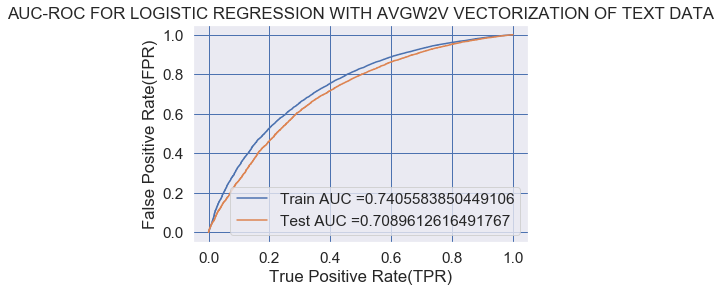

In [212]:
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC-ROC FOR LOGISTIC REGRESSION WITH AVGW2V VECTORIZATION OF TEXT DATA")

plt.show()

### We received the train accuracy of 0.74 and test accuracy of 0.71 which is not that bad actually.

# Confusion matrix for above data

### Confusion matrix for train and test data for AVGW2V vectorization

In [213]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.399
[[ 3713  3713]
 [ 7085 34530]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.474
[[ 3307  2152]
 [ 8789 21804]]


### Visually plotting the confusion matrix for training data

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.399


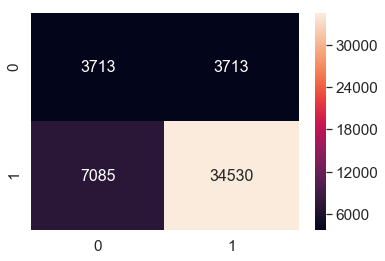

In [214]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Visually plotting the confusion matrix for testdata

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.474


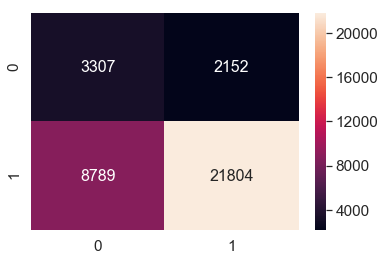

In [215]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_test = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_test, annot=True,annot_kws={"size": 16},fmt='g')# font size

# Set 4 : Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

###  Now we need to merge all the numerical vectors(categorical features,text features,numerical features) given above for set-3 which we created using different methods

In [216]:
from scipy.sparse import hstack

X_train_merge_set_4 = hstack((categories_one_hot_train,subcategories_one_hot_train,teacher_prefix_one_hot_train,project_grade_categories_one_hot_train,school_state_categories_one_hot_train,tfidf_w2v_vectors_text_train,tfidf_w2v_vectors_project_title_train,price_train,quantity_train,prev_projects_train)).tocsr()
X_test_merge_set_4 = hstack((categories_one_hot_test,subcategories_one_hot_test,teacher_prefix_one_hot_test,project_grade_categories_one_hot_test,school_state_categories_one_hot_test,tfidf_w2v_vectors_text_test,tfidf_w2v_vectors_project_title_test,price_test,quantity_test,prev_projects_test)).tocsr()
X_cv_merge_set_4 = hstack((categories_one_hot_cv,subcategories_one_hot_cv,teacher_prefix_one_hot_cv,project_grade_categories_one_hot_cv,school_state_categories_one_hot_cv,tfidf_w2v_vectors_text_cv,tfidf_w2v_vectors_project_title_cv,price_cv,quantity_cv,prev_projects_cv)).tocsr()

In [217]:
# this will be our finally created data matrix dimensions

print(X_train_merge_set_4.shape, y_train.shape)
print(X_test_merge_set_4.shape, y_test.shape)
print(X_cv_merge_set_4.shape,y_cv.shape)


(49041, 702) (49041,)
(36052, 702) (36052,)
(24155, 702) (24155,)


### Giving a set of values of 'C'(1/lamda) to get which works best.

In [218]:
tuned_parameters = {'C': [0.0075,0.015,0.03,0.06,0.15,0.3,0.75]}

In [219]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge_set_4,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0075, 0.015, 0.03, 0.06, 0.15, 0.3, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [220]:
#https://stackoverflow.com/questions/44947574/what-is-the-meaning-of-mean-test-score-in-cv-result

train_auc= model_lr.cv_results_['mean_train_score']
cv_auc = model_lr.cv_results_['mean_test_score']

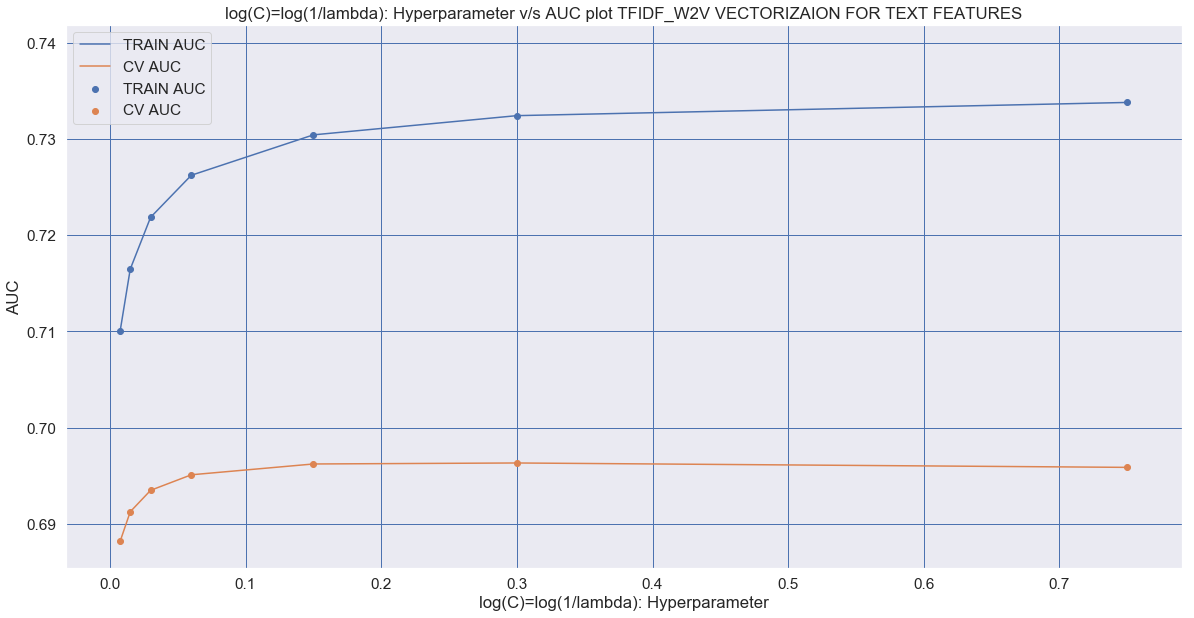

In [221]:

plt.figure(figsize=(20,10))
plt.scatter(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.scatter(tuned_parameters['C'],cv_auc,label = 'CV AUC')
plt.plot(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.plot(tuned_parameters['C'],cv_auc,label = 'CV AUC')

plt.grid(b=True, which='major', color='b', linestyle='-')
plt.legend()
plt.xlabel("log(C)=log(1/lambda): Hyperparameter")
plt.ylabel("AUC")
plt.title("log(C)=log(1/lambda): Hyperparameter v/s AUC plot TFIDF_W2V VECTORIZAION FOR TEXT FEATURES")
plt.show()

### From above we can say that the best hyperparameter value(C) based on the cv auc is at c = 0.3

## Now our task is to Train the Logistic Regression model based on the best hyperparameter value we received from above i.e. C=0.3

# Training the Logistic Regression model using the best hyperparameter value from above

In [224]:

tuned_parameters = {'C': [0.3]}


In [225]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge_set_4,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None, param_grid={'C': [0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### Model training done for the best hyperparameter now drawing the roc curve for the same.

In [226]:
y_train_pred =  model_lr.predict_proba(X_train_merge_set_4)[:,1]
    
y_test_pred =  model_lr.predict_proba(X_test_merge_set_4)[:,1]

In [227]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

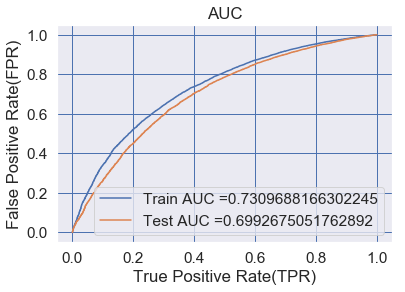

In [228]:
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")

plt.show()

### We received the train accuracy of 0.73 and test accuracy of 0.70 which is not that bad actually.

# Confusion matrix for above data

### Confusion matrix for train and test data for TFIDF-W2V vectorization

In [229]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.41
[[ 3713  3713]
 [ 7939 33676]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.468
[[ 3222  2237]
 [ 8819 21774]]


### Visually plotting the confusion matrix for training data

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.41


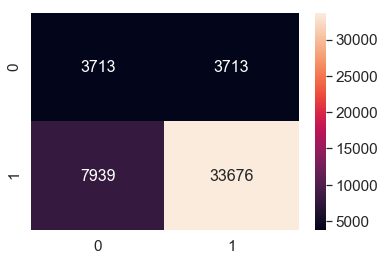

In [230]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Visually plotting the confusion matrix for testdata

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.468


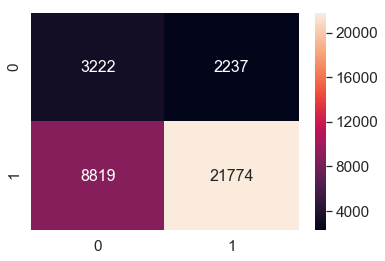

In [231]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_test = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_test, annot=True,annot_kws={"size": 16},fmt='g')# font size

# Logistic Regression with added Features `Set 5`

<li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>

### We have not calculated the three things from the above mentioned list rest all we have those three things are basically  1.) sentiment score's of each of the essay  2.) number of words in the title  3.) number of words in the combine essays 
### So let's calculate them first

## Project Title Word Count

#### training data

In [232]:
project_title_word_count_train = []
for i in range(0,len(preprocessed_project_titles_Train),1):
    project_title_word_count_train.append(len((preprocessed_project_titles_Train[i]).split()))

In [233]:
len(project_title_word_count_train)

49041

In [234]:
project_title_word_count_train[49040]

6

In [235]:
import numpy as np
project_title_word_count_train = np.asarray(project_title_word_count_train).reshape(len(project_title_word_count_train),1)
project_title_word_count_train.shape



(49041, 1)

#### Crossvalidation data

In [236]:
project_title_word_count_cv = []
for i in range(0,len(preprocessed_project_titles_Cv),1):
    project_title_word_count_cv.append(len((preprocessed_project_titles_Cv[i]).split()))

In [237]:
project_title_word_count_cv[490]

5

In [238]:
import numpy as np
project_title_word_count_cv = np.asarray(project_title_word_count_cv).reshape(len(project_title_word_count_cv),1)
project_title_word_count_cv.shape

(24155, 1)

#### Test data

In [239]:
project_title_word_count_test = []
for i in range(0,len(preprocessed_project_titles_Test),1):
    project_title_word_count_test.append(len((preprocessed_project_titles_Test[i]).split()))

In [240]:
project_title_word_count_test[490]

2

In [241]:
import numpy as np
project_title_word_count_test = np.asarray(project_title_word_count_test).reshape(len(project_title_word_count_test),1)
project_title_word_count_test.shape

(36052, 1)

# Project essay word count

#### training data

In [242]:
project_essay_word_count_train = []
for i in range(0,len(preprocessed_essays_Train),1):
    project_essay_word_count_train.append(len((preprocessed_essays_Train[i]).split()))

In [243]:
project_essay_word_count_train[490]



170

In [244]:
import numpy as np
project_essay_word_count_train = np.asarray(project_essay_word_count_train).reshape(len(project_essay_word_count_train),1)
project_essay_word_count_train.shape

(49041, 1)

### cross validation data

In [245]:
project_essay_word_count_cv = []
for i in range(0,len(preprocessed_essays_Cv),1):
    project_essay_word_count_cv.append(len((preprocessed_essays_Cv[i]).split()))

In [246]:
 project_essay_word_count_cv[490]

145

In [247]:
import numpy as np
project_essay_word_count_cv = np.asarray(project_essay_word_count_cv).reshape(len(project_essay_word_count_cv),1)
project_essay_word_count_cv.shape

(24155, 1)

### test data

In [248]:
project_essay_word_count_test = []
for i in range(0,len(preprocessed_essays_Test),1):
    project_essay_word_count_test.append(len((preprocessed_essays_Test[i]).split()))

In [249]:
 project_essay_word_count_test[490]

110

In [250]:
import numpy as np
project_essay_word_count_test = np.asarray(project_essay_word_count_test).reshape(len(project_essay_word_count_test),1)
project_essay_word_count_test.shape

(36052, 1)

# Sentiment score of each essay

In [251]:
# sample working of sentiment analyser

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [252]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [253]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\RASHU
[nltk_data]     TYAGI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [254]:
len(preprocessed_essays_Train)

49041

### Training data

In [255]:
sid = SentimentIntensityAnalyzer()

In [256]:
positive_train = []
negative_train = []
neutral_train = []
compound_train = []
for i in tqdm(preprocessed_essays_Train):
    positive_train.append(sid.polarity_scores(i)['pos'])
    negative_train.append(sid.polarity_scores(i)['neg'])
    neutral_train.append(sid.polarity_scores(i)['neu'])
    compound_train.append(sid.polarity_scores(i)['compound'])
    
    
    
    
    
    

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [04:23<00:00, 186.01it/s]


In [257]:
sid = SentimentIntensityAnalyzer()

In [258]:
positive_cv = []
negative_cv = []
neutral_cv = []
compound_cv = []
for i in tqdm(preprocessed_essays_Cv):
    positive_cv.append(sid.polarity_scores(i)['pos'])
    negative_cv.append(sid.polarity_scores(i)['neg'])
    neutral_cv.append(sid.polarity_scores(i)['neu'])
    compound_cv.append(sid.polarity_scores(i)['compound'])
    
    
    
    
    
    

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [02:10<00:00, 185.56it/s]


### Test data

In [259]:
sid = SentimentIntensityAnalyzer()

In [260]:
positive_test = []
negative_test = []
neutral_test = []
compound_test = []
for i in tqdm(preprocessed_essays_Test):
    positive_test.append(sid.polarity_scores(i)['pos'])
    negative_test.append(sid.polarity_scores(i)['neg'])
    neutral_test.append(sid.polarity_scores(i)['neu'])
    compound_test.append(sid.polarity_scores(i)['compound'])
    
    
    
    
    
    

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [03:13<00:00, 186.03it/s]


In [261]:
import numpy as np
neutral_train = np.asarray(neutral_train).reshape(len(preprocessed_essays_Train),1)
positive_train = np.asarray(positive_train).reshape(len(preprocessed_essays_Train),1)
negative_train = np.asarray(negative_train).reshape(len(preprocessed_essays_Train),1)
compound_train = np.asarray(compound_train).reshape(len(preprocessed_essays_Train),1)

print(neutral_train.shape)
print(positive_train.shape)
print(negative_train.shape)
print(compound_train.shape)

(49041, 1)
(49041, 1)
(49041, 1)
(49041, 1)


In [262]:
import numpy as np
neutral_cv = np.asarray(neutral_cv).reshape(len(preprocessed_essays_Cv),1)
positive_cv = np.asarray(positive_cv).reshape(len(preprocessed_essays_Cv),1)
negative_cv = np.asarray(negative_cv).reshape(len(preprocessed_essays_Cv),1)
compound_cv = np.asarray(compound_cv).reshape(len(preprocessed_essays_Cv),1)

print(neutral_cv.shape)
print(positive_cv.shape)
print(negative_cv.shape)
print(compound_cv.shape)

(24155, 1)
(24155, 1)
(24155, 1)
(24155, 1)


In [263]:
import numpy as np
neutral_test = np.asarray(neutral_test).reshape(len(preprocessed_essays_Test),1)
positive_test = np.asarray(positive_test).reshape(len(preprocessed_essays_Test),1)
negative_test = np.asarray(negative_test).reshape(len(preprocessed_essays_Test),1)
compound_test = np.asarray(compound_test).reshape(len(preprocessed_essays_Test),1)

print(neutral_test.shape)
print(positive_test.shape)
print(negative_test.shape)
print(compound_test.shape)

(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)


In [264]:
type(project_title_word_count_train)

numpy.ndarray

## Now merging all those features which are required for set-5

In [265]:
from scipy.sparse import hstack

X_train_merge_set_5 = hstack((categories_one_hot_train,subcategories_one_hot_train,teacher_prefix_one_hot_train,project_grade_categories_one_hot_train,school_state_categories_one_hot_train,price_train,quantity_train,prev_projects_train,project_title_word_count_train,project_essay_word_count_train,positive_train,negative_train,neutral_train,compound_train)).tocsr()
X_test_merge_set_5 = hstack((categories_one_hot_test,subcategories_one_hot_test,teacher_prefix_one_hot_test,project_grade_categories_one_hot_test,school_state_categories_one_hot_test,price_test,quantity_test,prev_projects_test,project_title_word_count_test,project_essay_word_count_test,positive_test,negative_test,neutral_test,compound_test)).tocsr()
X_cv_merge_set_5 = hstack((categories_one_hot_cv,subcategories_one_hot_cv,teacher_prefix_one_hot_cv,project_grade_categories_one_hot_cv,school_state_categories_one_hot_cv,price_cv,quantity_cv,prev_projects_cv,project_title_word_count_cv,project_essay_word_count_cv,positive_cv,negative_cv,neutral_cv,compound_cv)).tocsr()

In [266]:
# this will be our finally created data matrix dimensions

print(X_train_merge_set_5.shape, y_train.shape)
print(X_test_merge_set_5.shape, y_test.shape)
print(X_cv_merge_set_5.shape,y_cv.shape)

(49041, 108) (49041,)
(36052, 108) (36052,)
(24155, 108) (24155,)


### Giving a set of values of 'C'(1/lamda) to get which works best.

In [267]:
tuned_parameters = {'C': [0.0075,0.015,0.03,0.06,0.15,0.3,0.75]}

In [268]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge_set_5,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0075, 0.015, 0.03, 0.06, 0.15, 0.3, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [269]:

#https://stackoverflow.com/questions/44947574/what-is-the-meaning-of-mean-test-score-in-cv-result

train_auc= model_lr.cv_results_['mean_train_score']
cv_auc = model_lr.cv_results_['mean_test_score']


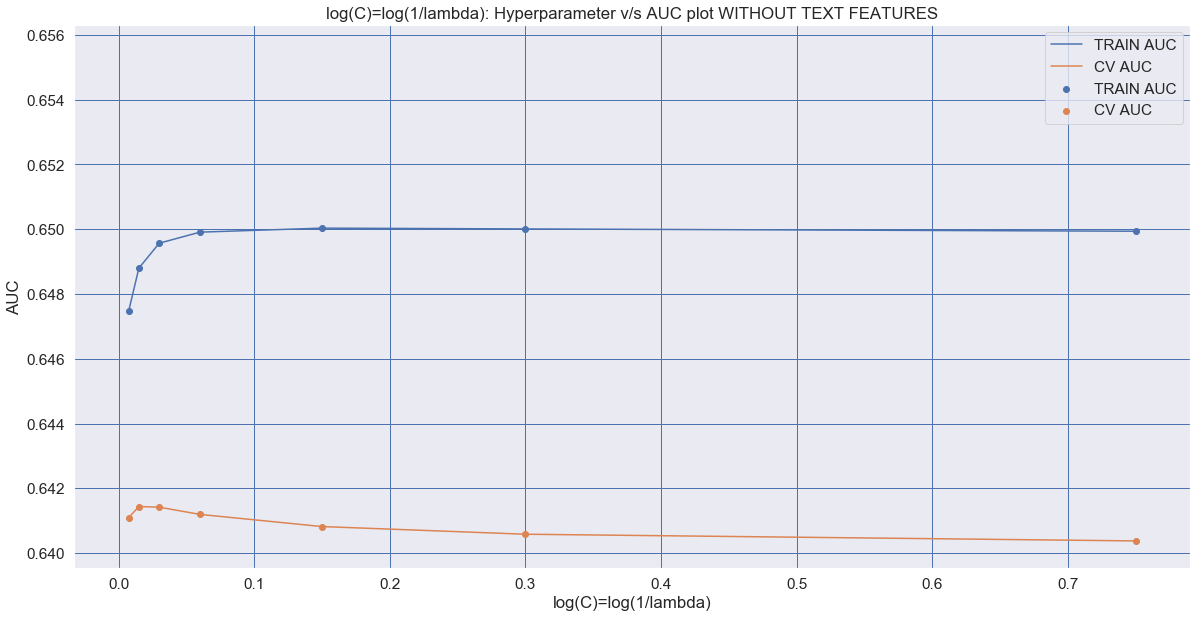

In [270]:

plt.figure(figsize=(20,10))
plt.scatter(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.scatter(tuned_parameters['C'],cv_auc,label = 'CV AUC')
plt.plot(tuned_parameters['C'],train_auc,label = 'TRAIN AUC')
plt.plot(tuned_parameters['C'],cv_auc,label = 'CV AUC')

plt.grid(b=True, which='major', color='b', linestyle='-')
plt.legend()
plt.xlabel("log(C)=log(1/lambda)")
plt.ylabel("AUC")
plt.title("log(C)=log(1/lambda): Hyperparameter v/s AUC plot WITHOUT TEXT FEATURES")
plt.show()

### From above we can say that the best hyperparameter value(C) based on the cv auc is at c = 0.015

## Now our task is to Train the Logistic Regression model based on the best hyperparameter value we received from above i.e. C=0.015

# Training the Logistic Regression model using the best hyperparameter value from above

In [271]:
tuned_parameters = {'C': [0.015]}

In [272]:
model_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),tuned_parameters,cv=10,scoring = 'roc_auc')
model_lr.fit(X_train_merge_set_5,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None, param_grid={'C': [0.015]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### Model training done for the best hyperparameter now drawing the roc curve for the same.

In [273]:
y_train_pred =  model_lr.predict_proba(X_train_merge_set_5)[:,1]
    
y_test_pred =  model_lr.predict_proba(X_test_merge_set_5)[:,1]

In [274]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

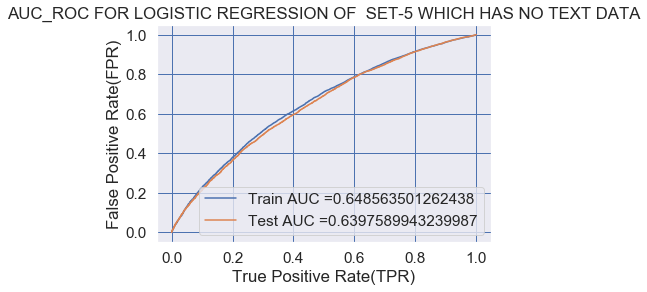

In [275]:
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC_ROC FOR LOGISTIC REGRESSION OF  SET-5 WHICH HAS NO TEXT DATA")

plt.show()

### We received the train accuracy of 0.64 and test accuracy of 0.64 which is quite fine

# Confusion matrix for above data

### Confusion matrix for train and test data for set-5

In [276]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.47
[[ 3713  3713]
 [12047 29568]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.506
[[ 3367  2092]
 [12864 17729]]


### Visually plotting the confusion matrix for training data

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.47


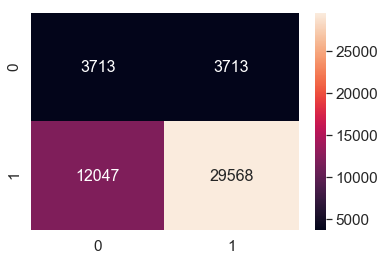

In [277]:

# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Visually plotting the confusion matrix for testdata

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.506


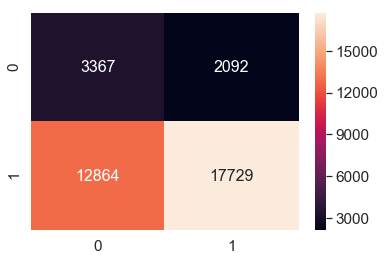

In [278]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_test = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_test, annot=True,annot_kws={"size": 16},fmt='g')# font size

# Final Conclusions

In [279]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()

x.field_names = ["Vectorization Used", "Model Applied", "C also equal to (1/lambda):Hyper Parameter", " TEST AUC"]

x.add_row(["BOW", "Logistic Regression", 0.0075, 0.72])
x.add_row(["TFIDF", "Logistic Regression", 0.3, 0.72])
x.add_row(["AVG W2V", "Logistic Regression", 0.75, 0.71])
x.add_row(["TFIDF W2V", "Logistic Regression", 0.75, 0.71])
x.add_row(["WITHOUT TEXT DATA", "Logistic Regression", 0.015, 0.64])
print(x)

+--------------------+---------------------+--------------------------------------------+-----------+
| Vectorization Used |    Model Applied    | C also equal to (1/lambda):Hyper Parameter |  TEST AUC |
+--------------------+---------------------+--------------------------------------------+-----------+
|        BOW         | Logistic Regression |                   0.0075                   |    0.72   |
|       TFIDF        | Logistic Regression |                    0.3                     |    0.72   |
|      AVG W2V       | Logistic Regression |                    0.75                    |    0.71   |
|     TFIDF W2V      | Logistic Regression |                    0.75                    |    0.71   |
| WITHOUT TEXT DATA  | Logistic Regression |                   0.015                    |    0.64   |
+--------------------+---------------------+--------------------------------------------+-----------+


# SUMMARY

### From above analysis we can clearly state that text data matters a lot for the purpose of classifying whether the project sumitted will get the approval or not because we can clearly see that as soon as we dropped all the text data our accuracy was highly dropped hence it directly corresponds to the fact that text data is very important for the purpose of classification while using logistic regression model as well